EXEMPLO DE PSO COM O DEAP

https://deap.readthedocs.io/en/master/examples/pso_basic.html

https://github.com/DEAP/deap/commit/c0743adb82237ba81340512e9f83748fb3b3b6c3

https://deap.readthedocs.io/en/master/api/benchmarks.html

In [0]:
#    This file is part of DEAP.
#
#    DEAP is free software: you can redistribute it and/or modify
#    it under the terms of the GNU Lesser General Public License as
#    published by the Free Software Foundation, either version 3 of
#    the License, or (at your option) any later version.
#
#    DEAP is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
#    GNU Lesser General Public License for more details.
#
#    You should have received a copy of the GNU Lesser General Public
#    License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

### Importações

In [0]:
import operator
import random

import numpy
import matplotlib.pyplot as plt

from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

### Espaço de Busca e Criação das Partículas

In [0]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Particle", list, fitness=creator.FitnessMax, speed=list, 
    smin=None, smax=None, best=None)

### Funcões de Inicialização das Partículas e Cálculo das Velocidades/Posições/Fitness

In [0]:
def generate(size, pmin, pmax, smin, smax):
    part = creator.Particle(random.uniform(pmin, pmax) for _ in range(size)) 
    part.speed = [random.uniform(smin, smax) for _ in range(size)]
    part.smin = smin
    part.smax = smax
    return part

In [0]:
def updateParticle(part, best, phi1, phi2):
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part))
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part))
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if speed < part.smin:
            part.speed[i] = part.smin
        elif speed > part.smax:
            part.speed[i] = part.smax
    part[:] = list(map(operator.add, part, part.speed))

### Parâmetros do PSO e definição da Função Objetivo

In [0]:
toolbox = base.Toolbox()
toolbox.register("particle", generate, size=2, pmin=-20, pmax=20, smin=-3, smax=3)
toolbox.register("population", tools.initRepeat, list, toolbox.particle)
toolbox.register("update", updateParticle, phi1=2.0, phi2=2.0)
toolbox.register("evaluate", benchmarks.sphere) #benchmarks.sphere <=> função esfera da biblioteca benchmarks

### Função Principal do PSO

In [0]:
def main():
    pop = toolbox.population(n=10)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    logbook = tools.Logbook()
    logbook.header = ["gen", "evals"] + stats.fields

    GEN = 100
    best = None

    for g in range(GEN):
        for part in pop:
            part.fitness.values = toolbox.evaluate(part)
            if not part.best or part.best.fitness > part.fitness:
                part.best = creator.Particle(part)
                part.best.fitness.values = part.fitness.values
            if not best or best.fitness > part.fitness:
                best = creator.Particle(part)
                best.fitness.values = part.fitness.values
        for part in pop:
            toolbox.update(part, best)

        # Gather all the fitnesses in one list and print the stats
        logbook.record(gen=g, evals=len(pop), **stats.compile(pop))
        #print(logbook.stream)
    
    return pop, logbook, best

### Gráfico de Avaliação dos Resultados

Best individual is: [0.0433144817219584, -0.044465928975592206]
with fitness: (0.0038533631665042785,)


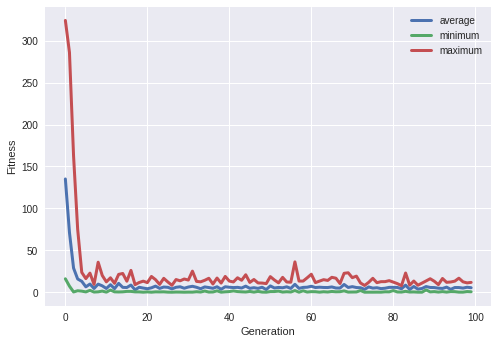

In [0]:
if __name__ == "__main__":
    pop, logbook, best = main();
    
    print("Best individual is: %s\nwith fitness: %s" % (best, best.fitness))
    
    gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average", linewidth=3)
    plt.plot(gen, min_, label="minimum", linewidth=3)
    plt.plot(gen, max_, label="maximum", linewidth=3)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()